### 영상 분할
영상 분할(image segmentation)은 입력 영상에서 관심 있는 영역을 분리하는 과정이다.  
이러한 영상 분할은 영상 분석, 물체 인식, 추적 등 대부분의 영상처리 응용에서 필수적인 단계이다.  
영상 분할은 크게 경계선 또는 영역으로 분할한다.  
임계법 사용방법은 가장 간단한 영상 분할 방법으로 <code>cv2.threshold()</code>, <code>cv2.adaptiveThreshold()</code>로서 선수 과정으로 알고있어야 하는 지식이다.  
사전 지식: <a href="https://wjddyd66.github.io/opencv/2019/10/23/OpenCV(4).html">임계값과 히스토그램 처리</a><br>

#### 필요한 라이브러리 임포트

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 
import IPython.display as display
from ipywidgets import Layout, Button, Box, Layout, Image, IntSlider, AppLayout

#### 필요한 데이터 생성1

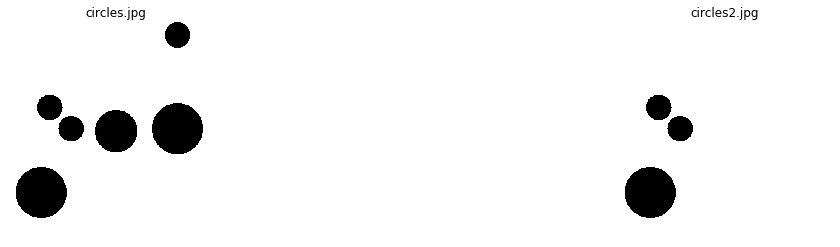

True

In [2]:
def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
img = np.zeros((512,512,3),dtype=np.int32)+255
img2 = np.zeros((512,512,3),dtype=np.int32)+255

pt1 = 100,200
pt2 = 150,250
pt3 = 256,256
pt4 = 400,250
pt5 = 400,30
pt6 = 80,400

cv2.circle(img,pt1,radius=30,color=(0,0,0),thickness=-1)
cv2.circle(img,pt2,radius=30,color=(0,0,0),thickness=-1)
cv2.circle(img,pt3,radius=50,color=(0,0,0),thickness=-1)
cv2.circle(img,pt4,radius=60,color=(0,0,0),thickness=-1)
cv2.circle(img,pt5,radius=30,color=(0,0,0),thickness=-1)
cv2.circle(img,pt6,radius=60,color=(0,0,0),thickness=-1)

cv2.circle(img2,pt1,radius=30,color=(0,0,0),thickness=-1)
cv2.circle(img2,pt2,radius=30,color=(0,0,0),thickness=-1)
cv2.circle(img2,pt6,radius=60,color=(0,0,0),thickness=-1)

plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('circles.jpg')
plt.axis('off')
plt.imshow(img, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('circles2.jpg')
plt.axis('off')
plt.imshow(img2, cmap="gray")

plt.show()

cv2.imwrite('./data/circle.jpg',img)
cv2.imwrite('./data/circle2.jpg',img2)

#### 필요한 데이터 생성2

True

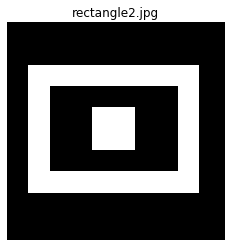

In [3]:
def plot(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
img = np.zeros((512,512,3),dtype=np.uint8)

cv2.rectangle(img,(50,100),(450,400),(255,255,255),-1)
cv2.rectangle(img,(100,150),(400,350),(0,0,0),-1)
cv2.rectangle(img,(200,200),(300,300),(255,255,255),-1)

plt.figure(figsize=(20,4))
plt.title('rectangle2.jpg')
plt.axis('off')
plt.imshow(img)

cv2.imwrite('./data/rectangle2.jpg',img)

### Canny 에지 검출


In [4]:
#Component 선언
IntSlider_Threshold1 = IntSlider(
    value=0,
    min=0,
    max=300,
    step=1,
    description='threshold1: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Threshold2 = IntSlider(
    value=0,
    min=0,
    max=300,
    step=1,
    description='threshold2: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="50%")
wImg_Canny = Image(layout = Layout(border="solid"), width="50%")

items = [IntSlider_Threshold1,IntSlider_Threshold2]
Trick_Bar = Box(items)
box = layout(Trick_Bar,wImg_original,wImg_Canny)


tab_nest = widgets.Tab()
tab_nest.children = [box]
tab_nest.set_title(0, 'Canny 에지검출')
tab_nest

img = cv2.imread('./data/lena.jpg',0)
tmpStream = cv2.imencode(".jpeg", img)[1].tostring()
wImg_original.value = tmpStream

display.display(tab_nest)

#Event 선언
threshold1, threshold2 = 0,0
    

def on_value_change_Threshold1(change):
    global threshold1, threshold2
    threshold1 = change['new']
    Canny_img = cv2.Canny(img,threshold1, threshold2)
    tmpStream = cv2.imencode(".jpeg", Canny_img)[1].tostring()
    wImg_Canny.value = tmpStream
   
    
def on_value_change_Threshold2(change):
    global threshold1, threshold2
    threshold2 = change['new']
    Canny_img = cv2.Canny(img,threshold1, threshold2)
    tmpStream = cv2.imencode(".jpeg", Canny_img)[1].tostring()
    wImg_Canny.value = tmpStream

#초기화 작업
Canny_img = cv2.Canny(img,threshold1, threshold2)
tmpStream = cv2.imencode(".jpeg", Canny_img)[1].tostring()
wImg_Canny.value = tmpStream

#Component에 Event 장착
IntSlider_Threshold1.observe(on_value_change_Threshold1, names='value')
IntSlider_Threshold2.observe(on_value_change_Threshold2, names='value')

### Hough 변환에 의한 직선, 원 검출

#### 직선검출: cv2.HoughLines(), cv2.HoughLinesP()

In [3]:
def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="20%")
wImg_Edges = Image(layout = Layout(border="solid"), width="20%")
wImg_Lines = Image(layout = Layout(border="solid"), width="20%")
wImg_Lines2 = Image(layout = Layout(border="solid"), width="20%")

items = [wImg_original,wImg_Edges,wImg_Lines,wImg_Lines2]
wImg=Box(items)

display.display(wImg)

src = cv2.imread('./data/rectangle.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(src,0,200)
lines = cv2.HoughLines(edges,rho=1,theta=np.pi/180.0,threshold=100)
lines2 = cv2.HoughLinesP(edges,rho=1,theta=np.pi/180.0,threshold=100)

print('HoughLines lines.shape=',lines.shape)
print('HoughLinesP lines.shape=',lines2.shape)

for line in lines:
    rho,theta = line[0]
    c = np.cos(theta)
    s = np.sin(theta)
    x0 = c*rho
    y0 = s*rho
    x1 = int(x0+1000*(-s))
    y1 = int(y0+1000*(c))
    x2 = int(x0+1000*(-s))
    y2 = int(y0+1000*(s))
    cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.line(src,(y1,x1),(y2,x2),(0,0,255),2)
    
tmpStream = cv2.imencode(".jpeg", gray)[1].tostring()
wImg_original.value = tmpStream

tmpStream = cv2.imencode(".jpeg", edges)[1].tostring()
wImg_Edges.value = tmpStream

tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_Lines.value = tmpStream

for line in lines2:
    x1,y1,x2,y2 = line[0]
    cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)
    
tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_Lines2.value = tmpStream

Box(children=(Image(value=b'', layout="Layout(border='solid')", width='20%'), Image(value=b'', layout="Layout(…

HoughLines lines.shape= (4, 1, 2)
HoughLinesP lines.shape= (4, 1, 4)


#### 원 검출: cv2.HoughCircles()

circle1.shape=  (1, 3, 3)
circle2.shape=  (1, 3, 3)


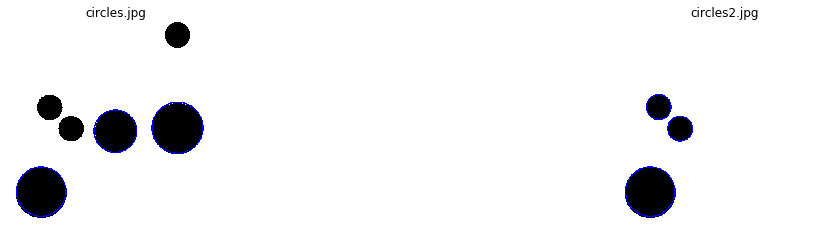

In [5]:
src1 = cv2.imread('./data/circle.jpg')
gray1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
circle1 = cv2.HoughCircles(gray1,method=cv2.HOUGH_GRADIENT,dp=1,minDist=50,param2=15,minRadius=40,maxRadius=100)
print('circle1.shape= ',circle1.shape)
for circle in circle1[0,:]:
    cx,cy,r = circle
    cv2.circle(src1,(cx,cy),r,(0,0,255),2)

src2 = cv2.imread('./data/circle2.jpg')
gray2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
circle2 = cv2.HoughCircles(gray2,method=cv2.HOUGH_GRADIENT,dp=1,minDist=50,param2=15)
print('circle2.shape= ',circle2.shape)
for circle in circle2[0,:]:
    cx,cy,r = circle
    cv2.circle(src2,(cx,cy),r,(0,0,255),2)

plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('circles.jpg')
plt.axis('off')
plt.imshow(src1, cmap="gray")

imgae2=plt.subplot(1,2,2)
imgae2.set_title('circles2.jpg')
plt.axis('off')
plt.imshow(src2, cmap="gray")

plt.show()

### 컬러 범위에 의한 영역 분할

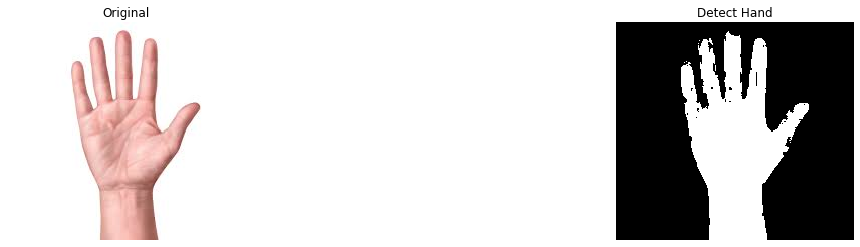

In [6]:
src = cv2.imread('./data/hand.jpg')
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
lower = (0,40,0)
upper = (20,180,255)
dst = cv2.inRange(hsv,lower,upper)

src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('Detect Hand')
plt.axis('off')
plt.imshow(dst, cmap="gray")

plt.show()

### 윤각선 검출 및 그리기

#### 윤각선 검출 및 그리기

contours1
type(contorous)= <class 'list'>
type(contorous[0])= <class 'numpy.ndarray'>
len(contours)= 10
contours[0].shape= (1, 1, 2)
contours[0]= [[[ 48 405]]]
--------------------
contours2
type(contorous2)= <class 'list'>
type(contorous2[0])= <class 'numpy.ndarray'>
len(contours2)= 20
contours2[0].shape= (1, 1, 2)
contours2[0]= [[[ 48 405]]]


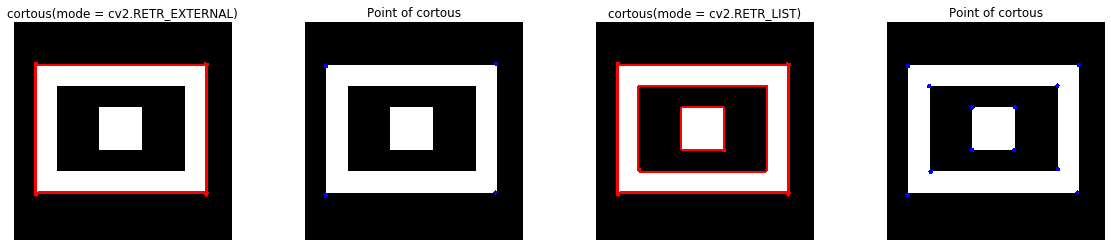

In [8]:
src = cv2.imread('./data/rectangle2.jpg')
src2 = np.copy(src)
src3 = np.copy(src)
src4 = np.copy(src)

gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

mode = cv2.RETR_EXTERNAL
mode2 = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE

contours, hierachy = cv2.findContours(gray,mode,method)
contours2, hierachy2 = cv2.findContours(gray,mode2,method)

print('contours1')
print('type(contorous)=',type(contours))
print('type(contorous[0])=',type(contours[0]))
print('len(contours)=',len(contours))
print('contours[0].shape=',contours[0].shape)
print('contours[0]=',contours[0])
print('-'*20)
print('contours2')
print('type(contorous2)=',type(contours2))
print('type(contorous2[0])=',type(contours2[0]))
print('len(contours2)=',len(contours2))
print('contours2[0].shape=',contours2[0].shape)
print('contours2[0]=',contours2[0])

def delete_duplicated_contours(contours):
    pt_array=[]
    for c in contours:
        for pt in range(0,len(c)):
            b = True
            for pt_arr in pt_array:
                if((pt_arr[0]>c[pt][0][0] - 10 and c[pt][0][0] + 10 > pt_arr[0]) and (pt_arr[1]>c[pt][0][1] - 10 and c[pt][0][1] + 10 > pt_arr[1])):
                    b = False
            if(b):
                pt_array.append(c[pt][0])
    return pt_array

pt_array1=delete_duplicated_contours(contours)
pt_array2=delete_duplicated_contours(contours2)

cv2.drawContours(src,contours,-1,(255,0,0),3)
cv2.drawContours(src3,contours2,-1,(255,0,0),3)

for pt in pt_array1:
    cv2.circle(src2,(pt[0],pt[1]),5,(0,0,255),-1)

for pt in pt_array2:
    cv2.circle(src4,(pt[0],pt[1]),5,(0,0,255),-1)
    
plt.figure(figsize=(20,4))

imgae1=plt.subplot(1,4,1)
imgae1.set_title('cortous(mode = cv2.RETR_EXTERNAL)')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,4,2)
imgae2.set_title('Point of cortous')
plt.axis('off')
plt.imshow(src2)

imgae1=plt.subplot(1,4,3)
imgae1.set_title('cortous(mode = cv2.RETR_LIST)')
plt.axis('off')
plt.imshow(src3)

imgae2=plt.subplot(1,4,4)
imgae2.set_title('Point of cortous')
plt.axis('off')
plt.imshow(src4)

### 영역 채우기, 인페인트, 거리계산, 워터쉐드

#### cv2.floodFill()영역 채우기

rect= (202, 202, 197, 197)


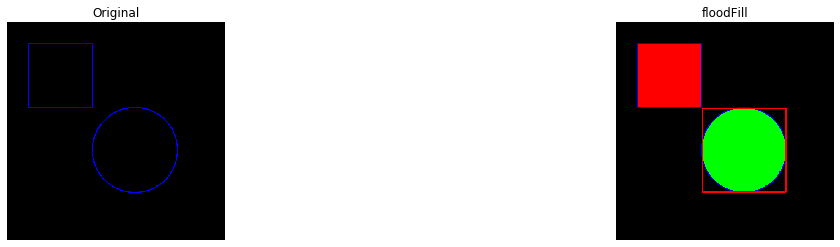

In [9]:
src = np.zeros((512,512,3),dtype=np.uint8)

cv2.rectangle(src,(50,50),(200,200),(0,0,255),2)
cv2.circle(src,(300,300),100,(0,0,255),2)

dst = src.copy()
cv2.floodFill(dst,mask=None,seedPoint=(100,100),newVal=(255,0,0))

retval,dst2,mask,rect = cv2.floodFill(dst,mask=None,seedPoint=(300,300),newVal=(0,255,0))

print('rect=',rect)
x,y,width,height = rect
cv2.rectangle(dst2,(x,y),(x+width,y+height),(255,0,0),2)

plt.figure(figsize=(20,4))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('floodFill')
plt.axis('off')
plt.imshow(dst)

#### cv2.distancdTransform() 거리계산

In [10]:
src = np.zeros((512,512),dtype=np.uint8)

cv2.rectangle(src,(50,200),(450,300),(255,255,255),-1)

dist = cv2.distanceTransform(src,distanceType=cv2.DIST_L1,maskSize=3)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(dist)
print('src:',minVal,maxVal,minLoc,maxLoc)

dst = cv2.normalize(dist,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U)
ret,dst2 = cv2.threshold(dist,maxVal-1,255,cv2.THRESH_BINARY)

gx = cv2.Sobel(dist,cv2.CV_32F,1,0,ksize=3)
gy = cv2.Sobel(dist,cv2.CV_32F,0,1,ksize=3)
mag = cv2.magnitude(gx,gy)

plt.figure(figsize=(20,4))
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(mag)
print('src:',minVal,maxVal,minLoc,maxLoc)
ret,dst3 = cv2.threshold(mag,maxVal-2,255,cv2.THRESH_BINARY_INV)

wImg_src = Image(layout = Layout(border="solid"), width="20%")
wImg_dst = Image(layout = Layout(border="solid"), width="20%")
wImg_dst2 = Image(layout = Layout(border="solid"), width="20%")
wImg_dst3 = Image(layout = Layout(border="solid"), width="20%")

items = [wImg_src,wImg_dst,wImg_dst2,wImg_dst3]
box = Box(items)
display.display(box)

tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_src.value = tmpStream
tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg_dst.value = tmpStream
tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
wImg_dst2.value = tmpStream
tmpStream = cv2.imencode(".jpeg", dst3)[1].tostring()
wImg_dst3.value = tmpStream

src: 0.0 51.0 (0, 0) (100, 250)
src: 0.0 8.0 (0, 0) (52, 200)


Box(children=(Image(value=b'', layout="Layout(border='solid')", width='20%'), Image(value=b'', layout="Layout(…

<Figure size 1440x288 with 0 Axes>

#### cv2.distanceTransform(), cv2.watershed() 영상 분할

In [11]:
src = cv2.imread('./data/circle.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,bimage = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist = cv2.distanceTransform(bimage,cv2.DIST_L1,3)
dist8 = cv2.normalize(dist,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U)

minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(dist)
print('dist:',minVal,maxVal,minLoc,maxLoc)
mask = (dist>maxVal*0.5).astype(np.uint8)*255

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours,hierarchy = cv2.findContours(mask,mode,method)
print('len(contours)=',len(contours))

markers = np.zeros(shape=src.shape[:2],dtype=np.int32)
for i,cnt in enumerate(contours):
    cv2.drawContours(markers,[cnt],0,i+1,-1)

dst = src.copy()
cv2.watershed(src,markers)

dst[markers == -1] = [0,0,255]
for i in range(len(contours)):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[markers==i+1] = [b,g,r]
dst = cv2.addWeighted(src,0.4,dst,0.6,0)

wImg_bimage = Image(layout = Layout(border="solid"), width="20%")
wImg_dist8 = Image(layout = Layout(border="solid"), width="20%")
wImg_mask = Image(layout = Layout(border="solid"), width="20%")
wImg_dst = Image(layout = Layout(border="solid"), width="20%")

items = [wImg_bimage,wImg_dist8,wImg_mask,wImg_dst]
box = Box(items)
display.display(box)

tmpStream = cv2.imencode(".jpeg", bimage)[1].tostring()
wImg_bimage.value = tmpStream
tmpStream = cv2.imencode(".jpeg", dist8)[1].tostring()
wImg_dist8.value = tmpStream
tmpStream = cv2.imencode(".jpeg", mask)[1].tostring()
wImg_mask.value = tmpStream
tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg_dst.value = tmpStream

dist: 0.0 61.0 (0, 0) (400, 250)
len(contours)= 6


Box(children=(Image(value=b'', layout="Layout(border='solid')", width='20%'), Image(value=b'', layout="Layout(…

### 피라미드 기반 분할

In [12]:
src = cv2.imread('./data/lena.jpg')

down2 = cv2.pyrDown(src)
down4 = cv2.pyrDown(down2)
print('donw2.shape=',down2.shape)
print('down4.shape=',down4.shape)

up2 = cv2.pyrUp(src)
up4 = cv2.pyrUp(up2)
print('up2.shape=',up2.shape)
print('up4.shape=',up4.shape)

wImg_original = Image(layout = Layout(border="solid"))
wImg_down4 = Image(layout = Layout(border="solid"))
wImg_up4 = Image(layout = Layout(border="solid"))

display.display(wImg_original,wImg_down4,wImg_up4)

tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_original.value = tmpStream
tmpStream = cv2.imencode(".jpeg", down4)[1].tostring()
wImg_down4.value = tmpStream
tmpStream = cv2.imencode(".jpeg", up4)[1].tostring()
wImg_up4.value = tmpStream

donw2.shape= (256, 256, 3)
down4.shape= (128, 128, 3)
up2.shape= (1024, 1024, 3)
up4.shape= (2048, 2048, 3)


Image(value=b'', layout="Layout(border='solid')")

Image(value=b'', layout="Layout(border='solid')")

Image(value=b'', layout="Layout(border='solid')")

#### cv2.pyrMeanShiftFiltering() 영역 검출

In [13]:
def floodFillPostProcess(src,diff=(2,2,2)):
    img = src.copy()
    rows,cols = img.shape[:2]
    mask = np.zeros(shape=(rows+2,cols+2),dtype=np.uint8)
    for y in range(rows):
        for x in range(cols):
            if mask[y+1,x+1] == 0:
                r = np.random.randint(256)
                g = np.random.randint(256)
                b = np.random.randint(256)
                cv2.floodFill(img,mask,(x,y),(b,g,r),diff,diff)
    return img

src = cv2.imread('./data/flower.jpg')
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
dst = floodFillPostProcess(src)
dst2 = floodFillPostProcess(hsv)

#Component 선언
IntSlider_sp1 = IntSlider(
    value=0,
    min=0,
    max=30,
    step=1,
    description='sp: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_sr1 = IntSlider(
    value=0,
    min=0,
    max=30,
    step=1,
    description='sr: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_maxLevel1 = IntSlider(
    value=0,
    min=0,
    max=20,
    step=1,
    description='maxLevel: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_sp2 = IntSlider(
    value=0,
    min=0,
    max=30,
    step=1,
    description='sp: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_sr2 = IntSlider(
    value=0,
    min=0,
    max=30,
    step=1,
    description='sr: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_maxLevel2 = IntSlider(
    value=0,
    min=0,
    max=5,
    step=1,
    description='maxLevel: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="50%")
wImg_hsv = Image(layout = Layout(border="solid"), width="50%")
wImg_original_floodFill = Image(layout = Layout(border="solid"), width="50%")
wImg_hsv_floodFill = Image(layout = Layout(border="solid"), width="50%")

wImg_res1 = Image(layout = Layout(border="solid"), width="50%") 
wImg_dst1 = Image(layout = Layout(border="solid"), width="50%") 

wImg_res2 = Image(layout = Layout(border="solid"), width="50%") 
wImg_dst2 = Image(layout = Layout(border="solid"), width="50%") 

items = [wImg_original,wImg_original_floodFill]
items2 = [wImg_hsv,wImg_hsv_floodFill]
floodFill1 = Box(items)
floodFill2 = Box(items2)
box1 = layout(None,floodFill1,floodFill2)

items = [IntSlider_sp1,IntSlider_sr1,IntSlider_maxLevel1]
trick_bar = Box(items)
box2 = layout(trick_bar,wImg_res1,wImg_dst1)

items = [IntSlider_sp2,IntSlider_sr2,IntSlider_maxLevel2]
trick_bar = Box(items)
box3 = layout(trick_bar,wImg_res2,wImg_dst2)

tab_nest = widgets.Tab()
tab_nest.children = [box1, box2, box3]
tab_nest.set_title(0, 'floodFill')
tab_nest.set_title(1, 'src 영역 검출')
tab_nest.set_title(2, 'hsv 영역 검출')
tab_nest

display.display(tab_nest)

#box1 값 대입
tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_original.value = tmpStream
tmpStream = cv2.imencode(".jpeg", hsv)[1].tostring()
wImg_hsv.value = tmpStream
tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
wImg_original_floodFill.value = tmpStream
tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
wImg_hsv_floodFill.value = tmpStream

sp1,sr1,maxLevel1 = 0,0,0
sp2,sr2,maxLevel2 = 0,0,0
    
#box2,3값 대입
def input_box_value(option=1):
    global sp1,sr1,maxLevel1,sp2,sr2,maxLevel2
    input_sp,input_sr,input_maxLevel,res = 0,0,0,0
    
    if option == 1:
        input_sp = sp1
        input_sr = sr1
        input_maxLevel = maxLevel1
        res = cv2.pyrMeanShiftFiltering(src,sp=input_sp,sr=input_sr,maxLevel=input_maxLevel)
    else:
        input_sp = sp2
        input_sr = sr2
        input_maxLevel = maxLevel2
        term_crit = (cv2.TERM_CRITERIA_MAX_ITER,10,2)
        res = cv2.pyrMeanShiftFiltering(hsv,sp=input_sp,sr=input_sr,maxLevel=input_maxLevel,termcrit=term_crit)
    dst = floodFillPostProcess(res)
    tmpStream = cv2.imencode(".jpeg", res)[1].tostring()
    tmpStream2 = cv2.imencode(".jpeg", dst)[1].tostring()
            
    if option == 1:
        wImg_res1.value = tmpStream
        wImg_dst1.value = tmpStream2
    else:
        wImg_res2.value = tmpStream
        wImg_dst2.value = tmpStream2
        
#Event 선언
def on_value_change_sp1(change):
    global sp1,sr1,maxLevel1
    sp1 = change['new']
    input_box_value()
    
    
def on_value_change_sr1(change):
    global sp1,sr1,maxLevel1
    sr1 = change['new']
    input_box_value()
    
def on_value_change_maxLevel1(change):
    global sp1,sr1,maxLevel1
    maxLevel1 = change['new']
    input_box_value()
    
def on_value_change_sp2(change):
    global sp2,sr2,maxLevel2
    sp2 = change['new']
    input_box_value(0)
    
    
def on_value_change_sr2(change):
    global sp2,sr2,maxLevel2
    sr2 = change['new']
    input_box_value(0)
    
def on_value_change_maxLevel2(change):
    global sp2,sr2,maxLevel2
    maxLevel2 = change['new']
    input_box_value(0)

#초기화 작업
input_box_value()
input_box_value(0)


#Component에 Event 장착
IntSlider_sp1.observe(on_value_change_sp1, names='value')
IntSlider_sr1.observe(on_value_change_sr1, names='value')
IntSlider_maxLevel1.observe(on_value_change_maxLevel1, names='value')

IntSlider_sp2.observe(on_value_change_sp2, names='value')
IntSlider_sr2.observe(on_value_change_sr2, names='value')
IntSlider_maxLevel2.observe(on_value_change_maxLevel2, names='value')

### K-Means 클러스터링 분할

#### 컬러 클러스터링 영역 검출

In [15]:
src1 = cv2.imread('./data/hand.jpg')
src2 = cv2.imread('./data/flower.jpg')

hsv1 = cv2.cvtColor(src1,cv2.COLOR_BGR2HSV)
hsv2 = cv2.cvtColor(src2,cv2.COLOR_BGR2HSV)

data1 = src1.reshape((-1,3)).astype(np.float32)
data2 = src2.reshape((-1,3)).astype(np.float32)

data3 = hsv1.reshape((-1,3)).astype(np.float32)
data4 = hsv2.reshape((-1,3)).astype(np.float32)

K = 3
term_crit = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

ret1,labels1,centers1 = cv2.kmeans(data1,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)
print('bgr')
print('hand.jpg')
print('centers.shape=',centers1.shape)
print('labels.shape=',labels1.shape)
print('ret=',ret1)
print('-'*20)

ret2,labels2,centers2 = cv2.kmeans(data2,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)
print('flower.jpg')
print('centers.shape=',centers2.shape)
print('labels.shape=',labels2.shape)
print('ret=',ret)

print('*'*20)
ret3,labels3,centers3 = cv2.kmeans(data3,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)
print('hsv')
print('hand.jpg')
print('centers.shape=',centers3.shape)
print('labels.shape=',labels3.shape)
print('ret=',ret3)
print('-'*20)

ret4,labels4,centers4 = cv2.kmeans(data4,K,None,term_crit,5,cv2.KMEANS_RANDOM_CENTERS)
print('flower.jpg')
print('centers.shape=',centers4.shape)
print('labels.shape=',labels4.shape)
print('ret=',ret4)


centers1 = np.uint8(centers1)
res1 = centers1[labels1.flatten()]
bgr1 = res1.reshape(src1.shape)

centers2 = np.uint8(centers2)
res2 = centers2[labels2.flatten()]
bgr2 = res2.reshape(src2.shape)


labels3 = np.uint8(labels3.reshape(src1.shape[:2]))
labels4 = np.uint8(labels4.reshape(src2.shape[:2]))

dst3 = np.zeros(src1.shape,dtype=src1.dtype)
dst4 = np.zeros(src2.shape,dtype=src2.dtype)

for i in range(K):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst3[labels3 ==i] = [b,g,r]
    dst4[labels4 ==i] = [b,g,r]

hsv1 = dst3
hsv2 = dst4



def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original1 = Image(layout = Layout(border="solid"), width="50%")
wImg_bgr1 = Image(layout = Layout(border="solid"), width="50%")
wImg_hsv1 = Image(layout = Layout(border="solid"), width="50%")

wImg_original2 = Image(layout = Layout(border="solid"), width="50%")
wImg_bgr2 = Image(layout = Layout(border="solid"), width="50%")
wImg_hsv2 = Image(layout = Layout(border="solid"), width="50%")

items = [wImg_bgr1,wImg_hsv1]
Clustering = Box(items)
box1 = layout(None,wImg_original1,Clustering)

items = [wImg_bgr2,wImg_hsv2]
Clustering = Box(items)
box2 = layout(None,wImg_original2,Clustering)

tab_nest = widgets.Tab()
tab_nest.children = [box1, box2]
tab_nest.set_title(0, 'Clustering1(BGR, HSV)')
tab_nest.set_title(1, 'Clustering2(BGR, HSV)')
tab_nest

display.display(tab_nest)

#box1 값 대입
tmpStream = cv2.imencode(".jpeg", src1)[1].tostring()
wImg_original1.value = tmpStream
tmpStream = cv2.imencode(".jpeg", bgr1)[1].tostring()
wImg_bgr1.value = tmpStream
tmpStream = cv2.imencode(".jpeg", hsv1)[1].tostring()
wImg_hsv1.value = tmpStream

#box2 값 대입
tmpStream = cv2.imencode(".jpeg", src2)[1].tostring()
wImg_original2.value = tmpStream
tmpStream = cv2.imencode(".jpeg", bgr2)[1].tostring()
wImg_bgr2.value = tmpStream
tmpStream = cv2.imencode(".jpeg", hsv2)[1].tostring()
wImg_hsv2.value = tmpStream

bgr
hand.jpg
centers.shape= (3, 3)
labels.shape= (50525, 1)
ret= 11729316.883609176
--------------------
flower.jpg
centers.shape= (3, 3)
labels.shape= (375000, 1)
ret= 8.0
********************
hsv
hand.jpg
centers.shape= (3, 3)
labels.shape= (50525, 1)
ret= 26116860.544728875
--------------------
flower.jpg
centers.shape= (3, 3)
labels.shape= (375000, 1)
ret= 691618311.1833671


### 연결요소 검출

#### 레이블링

ret= 4
ret2= 4
stats= [[     0      0    512    512 245213]
 [    70    170     61     61   2821]
 [   120    220     61     61   2821]
 [    20    340    121    121  11289]]
centroids [[266.58220404 249.54933874]
 [100.         200.        ]
 [150.         250.        ]
 [ 80.         400.        ]]


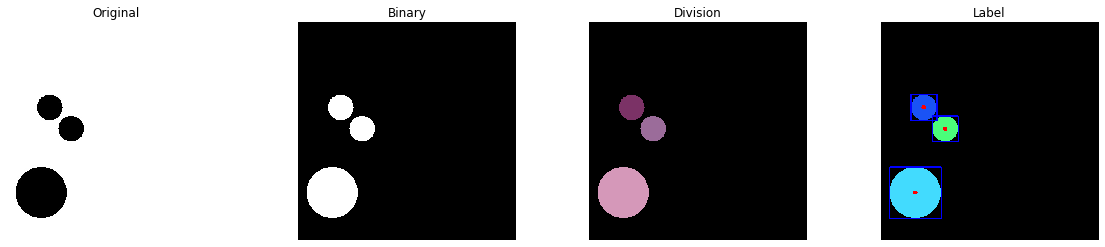

In [16]:
src = cv2.imread('./data/circle2.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret,res = cv2.threshold(gray,128,255,cv2.THRESH_BINARY_INV)

ret,labels = cv2.connectedComponents(res)
print('ret=',ret)

dst = np.zeros(src.shape,dtype=src.dtype)

for i in range(1,ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b,g,r]

ret2,labels2,stats,centroids = cv2.connectedComponentsWithStats(res)
print('ret2=',ret2)
print('stats=',stats)
print('centroids',centroids)

dst2 = np.zeros(src.shape,dtype=src.dtype)

for i in range(1,int(ret2)):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst2[labels2 == i] = [b,g,r]

for i in range(1,int(ret2)):
    x,y,width,height,area = stats[i]
    cv2.rectangle(dst2,(x,y),(x+width,y+height),(0,0,255),2)
    cx,cy = centroids[i]
    cv2.circle(dst2,(int(cx),int(cy)),5,(255,0,0),-1)


plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,4,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,4,2)
imgae2.set_title('Binary')
plt.axis('off')
plt.imshow(res, cmap="gray")

imgae3=plt.subplot(1,4,3)
imgae3.set_title('Division')
plt.axis('off')
plt.imshow(dst)

imgae3=plt.subplot(1,4,4)
imgae3.set_title('Label')
plt.axis('off')
plt.imshow(dst2)